<a href="https://colab.research.google.com/github/cellularphone/data-science/blob/main/DataBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring Data Scraping, Analysis, and Visualization: Practical Examples by Hannu Valve

# Imports

In [ ]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import logging
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import MinMaxScaler

# Section 1, IMDB Scraping and Analysis

#### Scraping

In [ ]:
# Make a request to the IMDb URL
url = "https://www.imdb.com/chart/top"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Parse the HTML content using BeautifulSoup (to find script tag)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the script tag with id __NEXT_DATA__
script_tag = soup.find('script', {'id': '__NEXT_DATA__'})

# Extract the JSON data from the script tag
if script_tag:
    json_data_str = script_tag.string
    json_data_str = json_data_str.replace('undefined', 'null')  # Replace 'undefined' with 'null' to make the JSON string valid

    # Load JSON data
    try:
        json_data = json.loads(json_data_str)
    except json.JSONDecodeError:
        print("Error: Unable to decode JSON data.")
        exit()

    # Access the movie details from the JSON data
    movies = json_data.get('props', {}).get('pageProps', {}).get('pageData', {}).get('chartTitles', {}).get('edges', [])

    for index, movie in enumerate(movies, start=1):
        movie_node = movie.get('node', {})
        movie_id = movie_node.get('id')
        title = movie_node.get('titleText', {}).get('text')
        year = movie_node.get('releaseYear', {}).get('year')
        rating = movie_node.get('ratingsSummary', {}).get('aggregateRating')
        vote_count = movie_node.get('ratingsSummary', {}).get('voteCount')

        # Print the movie details
        # print(f"{index}. ID: {movie_id}, Title: {title}, Year: {year}, Rating: {rating}, Votes: {vote_count}")
else:
    print("Error: Script tag not found or JSON data unavailable.")
    exit()

#### Data Analysis

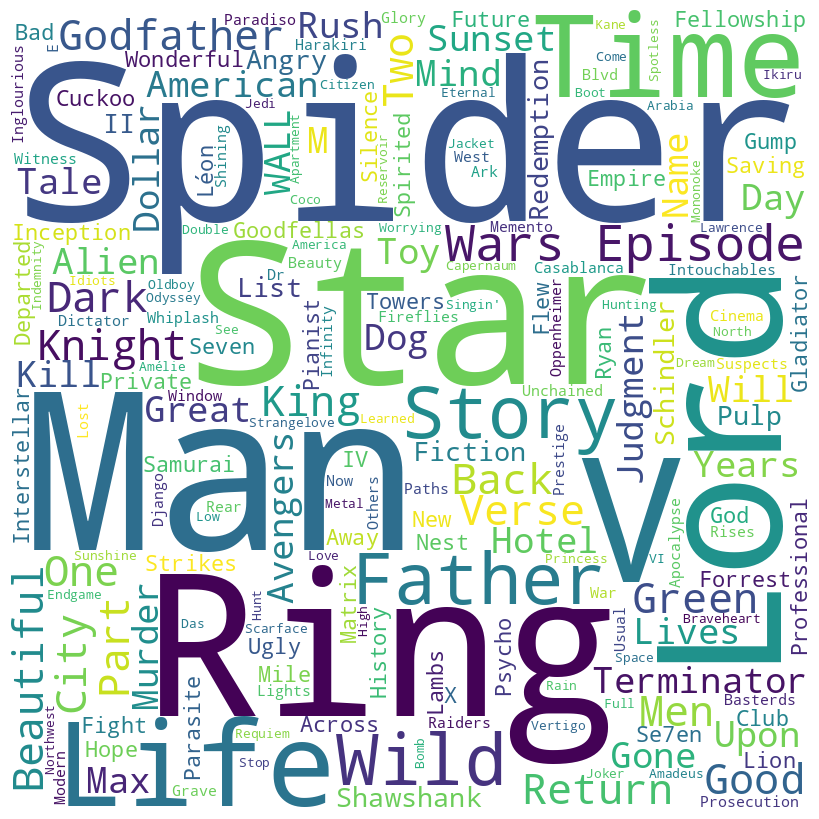

In [ ]:
# Extract the titles of the movies
titles = [movie['node']['titleText']['text'] for movie in movies]

# Create a word cloud of the movie titles
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(titles))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Perform data analysis
# For example, you can calculate the average rating and the movie with the highest rating
ratings = [movie['node']['ratingsSummary']['aggregateRating'] for movie in movies]
average_rating = sum(ratings) / len(ratings)
highest_rated_movie = max(movies, key=lambda x: x['node']['ratingsSummary']['aggregateRating'])

# Print the results of the data analysis
print(f"Average Rating: {average_rating:.2f}")
print(f"Highest Rated Movie: {highest_rated_movie['node']['titleText']['text']} - Rating: {highest_rated_movie['node']['ratingsSummary']['aggregateRating']}")

# Calculate the average runtime of the movies
runtimes = [movie['node']['runtime']['seconds'] for movie in movies]
average_runtime = sum(runtimes) / len(runtimes)

# Print the result
print(f"Average Runtime: {average_runtime // 60} minutes")

# Calculate the average release year of the movies
release_years = [movie['node']['releaseYear']['year'] for movie in movies]
average_release_year = sum(release_years) / len(release_years)

# Print the result
print(f"Average Release Year: {int(average_release_year)}")

Average Rating: 8.31
Highest Rated Movie: The Shawshank Redemption - Rating: 9.3
Average Runtime: 129.0 minutes
Average Release Year: 1986


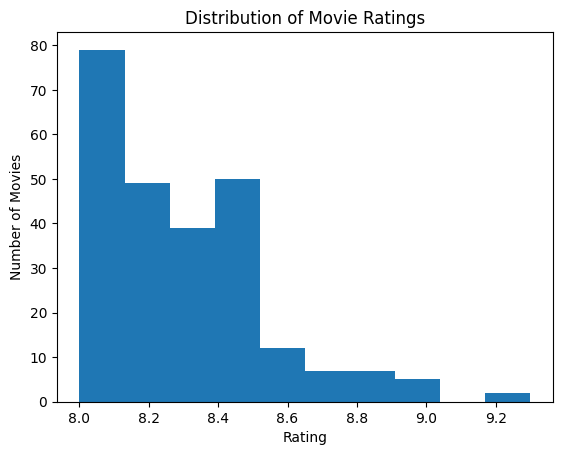

In [ ]:
# Visualize the distribution of movie ratings
ratings = [movie['node']['ratingsSummary']['aggregateRating'] for movie in movies]
plt.hist(ratings, bins=10)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.show()

In [ ]:
# Create a dictionary of genres and the number of movies in each genre
genre_counts = {}
for movie in movies:
    for genre in movie['node']['titleGenres']['genres']:
        genre_name = genre['genre']['text']
        if genre_name in genre_counts:
            genre_counts[genre_name] += 1
        else:
            genre_counts[genre_name] = 1

# Create a bar chart of the number of movies per genre
fig = go.Figure(data=[go.Bar(x=list(genre_counts.keys()), y=list(genre_counts.values()))])
fig.update_layout(title='Number of Movies per Genre', xaxis_title='Genre', yaxis_title='Number of Movies')
fig.show()

In [ ]:
# Extract the release year for each movie
years = [movie['node']['releaseYear']['year'] for movie in movies]

# Count the number of movies released each year
year_counts = {}
for year in years:
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1

# Create a bar chart of the number of movies per year
fig = go.Figure(data=[go.Bar(x=list(year_counts.keys()), y=list(year_counts.values()))])
fig.update_layout(title='Number of TOP Movies Released Each Year', xaxis_title='Year', yaxis_title='Number of Movies')
fig.show()

In [ ]:
# Extract the ratings and number of votes for each movie
ratings = [movie['node']['ratingsSummary']['aggregateRating'] for movie in movies]
votes = [movie['node']['ratingsSummary']['voteCount'] for movie in movies]
titles = [movie['node']['titleText']['text'] for movie in movies]

# Create a scatter plot of average rating vs. number of votes
fig = go.Figure(data=[go.Scatter(x=votes, y=ratings, mode='markers',
                                  hovertext=titles, marker=dict(size=10))])
fig.update_layout(title='Average Rating vs. Number of Votes',
                  xaxis_title='Number of Votes', yaxis_title='Average Rating')
fig.show()


In [ ]:
# Extract the ratings and genres for each movie
ratings = [movie['node']['ratingsSummary']['aggregateRating'] for movie in movies]
genres = []
for movie in movies:
    for genre in movie['node']['titleGenres']['genres']:
        genres.append(genre['genre']['text'])

# Create a box plot of ratings by genre
fig = go.Figure(data=[go.Box(x=genres, y=ratings)])
fig.update_layout(title='Ratings by Genre', xaxis_title='Genre', yaxis_title='Rating')
fig.show()

# Section 2, Ebay Scraping and Analysis

#### Scraping

In [ ]:
# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Constants
EBAY_SOLD_ITEMS_URL = 'https://www.ebay.com/sch/i.html?_nkw={}&LH_Sold=1'

def extract_sold_item_data(item):
    title_element = item.find('a', {'class': 's-item__link'})
    price_element = item.find('span', {'class': 's-item__price'})
    date_element = item.find('span', {'class': 'POSITIVE'})
    condition_element = item.find('span', {'class': 'SECONDARY_INFO'})
    seller_element = item.find('span', {'class': 's-item__seller-info-text'})

    if all(element is not None for element in [title_element, price_element, date_element]):
        title = title_element.text.strip()
        link = title_element['href']
        price = price_element.text.strip()
        date = date_element.text.strip()
        condition = condition_element.text.strip() if condition_element else None
        seller_info = seller_element.text.strip() if seller_element else None

        return {
            'title': title,
            'link': link,
            'price': price,
            'date': date,
            'condition': condition,
            'seller_info': seller_info
        }
    else:
        return None

def scrape_ebay_sold_items(query):
    scraped_data = []
    try:
        url = EBAY_SOLD_ITEMS_URL.format(query)
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')
        items = soup.find_all('div', {'class': 's-item__wrapper'})

        for item in items:
            data = extract_sold_item_data(item)
            if data:
                scraped_data.append(data)

        return scraped_data

    except requests.exceptions.RequestException as e:
        logger.error(f"An error occurred during the request: {e}")
    except Exception as e:
        logger.error(f"An unexpected error occurred: {e}")

def clean_data(ebay_sold_items_df):
    ebay_sold_items_df['date'] = pd.to_datetime(ebay_sold_items_df['date'].str.split('Sold  ').str[1], format='%b %d, %Y')
    ebay_sold_items_df['price'] = ebay_sold_items_df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    ebay_sold_items_df['price'] = pd.to_numeric(ebay_sold_items_df['price'], errors='coerce')
    return ebay_sold_items_df

if __name__ == "__main__":

    # Possibility for user to input the query
    # query = input("Enter the search query: ")

    query = '2023 Taiwan Pokemon Center Open Promo Card'
    sold_items_data = scrape_ebay_sold_items(query)

    if sold_items_data:
        ebay_sold_items_df = pd.DataFrame(sold_items_data)
        cleaned_data = clean_data(ebay_sold_items_df)
        logger.info(f"Scraped data:\n{cleaned_data}")
    else:
        logger.info("No data scraped.")


In [ ]:
# Convert 'date' column to datetime format
ebay_sold_items_df['date'] = pd.to_datetime(ebay_sold_items_df['date'])

# Get the current month
current_month = datetime.now().month

# Filter the DataFrame for the running month
current_month_df = ebay_sold_items_df[ebay_sold_items_df['date'].dt.month == current_month]

#### Data Analysis

In [ ]:
total_sales = current_month_df['price'].sum()
print("\nTotal sales for the current month: $", total_sales)
average_price = current_month_df['price'].mean().round(2)
print("\nAverage price of sold items for the current month: $", average_price)
most_expensive_item = current_month_df.sort_values('price', ascending=False).iloc[0]
print("\nThe most expensive item sold in the current month:\n")
print(most_expensive_item)
current_month_df


Total sales for the current month: $ 2037.5800000000002

Average price of sold items for the current month: $ 52.25

The most expensive item sold in the current month:

title          New ListingTaipei Pikachu!2023 Taiwan Pokemon ...
link           https://www.ebay.com/itm/126236100629?hash=ite...
price                                                      250.0
date                                         2023-12-14 00:00:00
condition                                              Brand New
seller_info                            jarvislung1979 (266) 100%
Name: 0, dtype: object


,title,link,price,date,condition,seller_info
0,New ListingTaipei Pikachu!2023 Taiwan Pokemon ...,https://www.ebay.com/itm/126236100629?hash=ite...,250.00,2023-12-14,Brand New,jarvislung1979 (266) 100%
1,2023 Taiwan Pokemon Center Open Promo Card 057...,https://www.ebay.com/itm/225907760351?hash=ite...,45.99,2023-12-13,Pre-Owned,"gamecardscorner (5,896) 99.5%"
2,2023 Taiwan Pokemon Center Opening Promo Card ...,https://www.ebay.com/itm/276218822692?hash=ite...,34.99,2023-12-13,Pre-Owned,"topcode2880 (49,593) 94.4%"
3,2023 Taiwan Pokemon Center Open Promo Card 057...,https://www.ebay.com/itm/116008856644?hash=ite...,40.00,2023-12-13,Pre-Owned,allenl513 (41) 100%
4,2023 Taiwan Pokemon Center Open Promo Card 057...,https://www.ebay.com/itm/204577249699?hash=ite...,46.47,2023-12-12,Pre-Owned,cardsgallery194 (205) 100%
5,Taiwan Pokemon Center Open Promo Card 057/SV-P...,https://www.ebay.com/itm/375109371086?hash=ite...,66.49,2023-12-12,Pre-Owned,fanghai_72 (523) 100%
6,Taiwan Pokemon Center Open Promo Card 057/SV-P...,https://www.ebay.com/itm/386410141285?hash=ite...,47.49,2023-12-12,Pre-Owned,liubabyshop (61) 91.2%
7,2023 Taiwan Pokemon Center Opening Promo Card ...,https://www.ebay.com/itm/386384098450?hash=ite...,34.99,2023-12-12,Pre-Owned,cardcenter1188 (0) 0%
8,Taiwan Taipei Pokemon Center Promo Card Pikach...,https://www.ebay.com/itm/305309514440?hash=ite...,48.00,2023-12-11,Pre-Owned,wenwenwen680505 (483) 100%
9,2023 Taiwan Pokemon Center Open Promo Card 057...,https://www.ebay.com/itm/315019645435?hash=ite...,48.29,2023-12-11,Pre-Owned,kejios749273 (84) 97.7%


In [ ]:
# Visualization 1: Item Condition Distribution
fig_pie = px.pie(ebay_sold_items_df, names='condition', title='Item Condition Distribution',
              color_discrete_sequence=px.colors.qualitative.Set2)
fig_pie.update_traces(textinfo='percent+label', pull=[0.05] * len(ebay_sold_items_df['condition'].unique()))

# Visualization 2: Seller Rating vs. Price
seller_ratings = ebay_sold_items_df['seller_info'].apply(lambda x: int(x.split()[1][1:-1].replace(',', '')))
fig_scatter = px.scatter(ebay_sold_items_df, x=seller_ratings, y='price',
                  labels={'x': 'Seller Ratings', 'y': 'Price'}, title='Seller Rating vs. Price',
                  color='condition', color_discrete_sequence=px.colors.qualitative.Set2)
fig_scatter.update_traces(marker=dict(size=8, line=dict(width=0.5, color='black')), selector=dict(mode='markers'))

fig_pie.show()
print("\n")
fig_scatter.show()

In [ ]:
# Visualization 3: Price Distribution Histogram
price_distribution = px.histogram(ebay_sold_items_df, x='price', title='Price Distribution',
                                  template='plotly_white', opacity=0.7,
                                )
price_distribution.update_traces(marker_line_color='navy', marker_line_width=0.5)

# Visualization 4: Top Sellers by Quantity Sold Bar Chart
top_sellers = ebay_sold_items_df['seller_info'].value_counts().head(10)
top_sellers_chart = px.bar(top_sellers, x=top_sellers.index, y=top_sellers.values,
                           title='Top Sellers by Quantity Sold', color=top_sellers.values,
                           color_continuous_scale='RdBu')
top_sellers_chart.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.8)

# Show or save the updated visualizations
price_distribution.show()
print("\n")
top_sellers_chart.show()

# Section 3, Goodreads Scraping and Analysis

#### Scraping

In [ ]:
# Make a request to the URL
url = "https://www.goodreads.com/genres/most_read/classics"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all script tags
script_tags = soup.find_all('script')

# Define regular expressions to extract book information
book_title_regex = re.compile(r'<h2><a class=\\"readable bookTitle\\" href=\\"([^\\]+)\\">([^<]+)<\\/a><\\/h2>')
author_regex = re.compile(r'by <a class=\\"authorName\\" href=\\"/author/show/[^\\]+\\">([^<]+)<\\/a>')
rating_regex = re.compile(r'staticStar p(\d+)')
avg_rating_regex = re.compile(r'(\d+\.\d+) avg rating')
published_year_regex = re.compile(r'published (\d{4})')
rating_count_regex = re.compile(r'&mdash; (\d{1,3}(?:,\d{3})*?) ratings')

# Initialize a list to store the extracted book information
book_info = []

# Iterate through script tags to find book information
for script_tag in script_tags:
    script_content = str(script_tag.string)  # Convert to string for regex matching

    # Extract the book information using regular expressions
    book_title_match = book_title_regex.search(script_content)
    author_match = author_regex.search(script_content)
    rating_match = rating_regex.search(script_content)
    avg_rating_match = avg_rating_regex.search(script_content)
    published_year_match = published_year_regex.search(script_content)
    rating_count_match = rating_count_regex.search(script_content)


    # Check if all information is found
    if all([book_title_match, author_match, rating_match, avg_rating_match, published_year_match, rating_count_match]):
        # Store the extracted information in a dictionary
        book = {
            'Title': book_title_match.group(2),
            'Author': author_match.group(1),
            'Rating': rating_match.group(1),
            'Avg Rating': avg_rating_match.group(1),
            'Published Year': published_year_match.group(1),
            'Rating Count': rating_count_match.group(1)

        }
        # Append the dictionary to the book_info list
        book_info.append(book)

# Create a DataFrame with the extracted information
df = pd.DataFrame(book_info)

In [ ]:
# Convert specific columns to desired data types
df['Rating'] = df['Rating'].astype(float)
df['Avg Rating'] = df['Avg Rating'].astype(float)
df['Rating Count'] = df['Rating Count'].str.replace(',', '').astype(int)
df['Published Year'] = df['Published Year'].astype(int)
books_df= df[["Title","Author","Avg Rating","Published Year","Rating Count"]]

#### Data Analysis

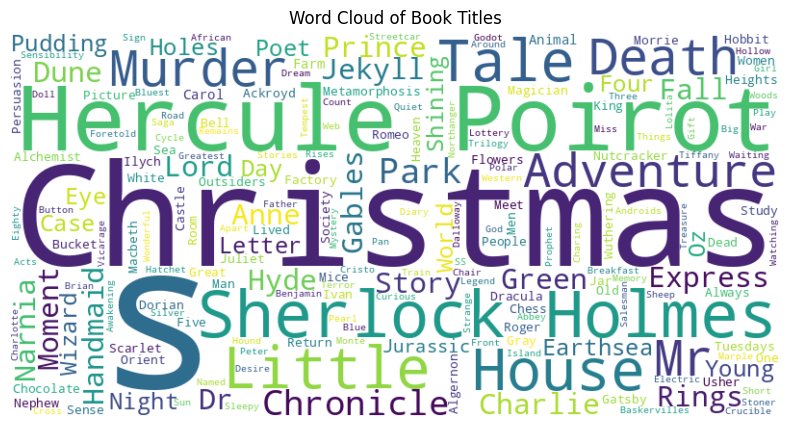

In [ ]:
# Generate a word cloud of Book Titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Title']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles')
plt.show()


In [ ]:
# Create a scatter plot of Ratings vs. Published Year
fig = px.scatter(df, x='Published Year', y='Avg Rating', color='Avg Rating', size='Avg Rating',
                 hover_data=['Title', 'Author'], title='Scatter Plot of Ratings vs. Published Year')
fig.show()


In [ ]:
# Sorting the DataFrame by 'Avg Rating' and 'Rating Count' for better visualization
df_sorted_by_avg_rating = df.sort_values(by='Avg Rating', ascending=False).head(10)
df_sorted_by_rating_count = df.sort_values(by='Rating Count', ascending=False).head(10)

# Convert 'Rating Count' into millions for better readability
df_sorted_by_rating_count['Rating Count (Millions)'] = df_sorted_by_rating_count['Rating Count'] / 1_000_000

# Add Author column to book titles for the hover text
df_sorted_by_avg_rating['Title_Author'] = df_sorted_by_avg_rating['Title'] + ' - by ' + df_sorted_by_avg_rating['Author']
df_sorted_by_rating_count['Title_Author'] = df_sorted_by_rating_count['Title'] + ' - by ' + df_sorted_by_rating_count['Author']

# Create a custom color scale for better visualization without green at the top
color_scale = px.colors.diverging.Portland  # You can choose different diverging color scales

# Create horizontal bar chart for 'Avg Rating' (top 10 books) using Plotly Express with custom colors
fig_avg_rating = px.bar(df_sorted_by_avg_rating, x='Avg Rating', y='Title', orientation='h',
             text='Avg Rating', title='Top 10 Books by Average Ratings',
             labels={'Title': 'Book', 'Avg Rating': 'Average Rating'}, hover_data=['Author'],
             color='Avg Rating', color_continuous_scale=color_scale)
fig_avg_rating.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_avg_rating.update_layout(yaxis={'categoryorder':'total ascending'})
fig_avg_rating.show()

# Create horizontal bar chart for 'Rating Count' (top 10 books) using Plotly Express with custom colors
fig_rating_count = px.bar(df_sorted_by_rating_count, x='Rating Count (Millions)', y='Title', orientation='h',
             text='Rating Count (Millions)', title='Top 10 Books by Rating Counts',
             labels={'Title': 'Book', 'Rating Count (Millions)': 'Rating Count (Millions)'}, hover_data=['Author','Avg Rating'],
             color='Rating Count (Millions)', color_continuous_scale=color_scale)
fig_rating_count.update_traces(texttemplate='%{text:.2f}M', textposition='outside')
fig_rating_count.update_layout(yaxis={'categoryorder':'total ascending'})
fig_rating_count.show()

In [ ]:
# Sorting the DataFrame by 'Avg Rating' for better visualization
df_sorted_by_avg_rating = df.sort_values(by='Avg Rating', ascending=False).head(100)

# Create a scatter plot to compare 'Avg Rating' and 'Rating Count' for the top 100 books
fig_scatter = px.scatter(df_sorted_by_avg_rating, x='Avg Rating', y='Rating Count',
                         hover_name='Title', title='Scatter Plot of Average Rating vs Rating Count',
                         labels={'Avg Rating': 'Average Rating', 'Rating Count': 'Rating Count'},
                         color='Author')

fig_scatter.update_traces(marker=dict(size=12, opacity=0.8))
fig_scatter.update_layout(xaxis=dict(range=[df_sorted_by_avg_rating['Avg Rating'].min() - 0.1,
                                           df_sorted_by_avg_rating['Avg Rating'].max() + 0.1]),
                          yaxis=dict(range=[df_sorted_by_avg_rating['Rating Count'].min() - 500_000,
                                           df_sorted_by_avg_rating['Rating Count'].max() + 500_000]))
fig_scatter.show()

# Section 4, Crypto Scraping and Predictions

## CNN-LSTM Model
#### Convolutional Neural Network - Long Short-Term Memory (CNN-LSTM) models are effective in making accurate predictions by capturing long-term dependencies and extracting essential features from time series data, enabling an understanding of intricate temporal relationships, resulting in precise forecasting capabilities.

**CAUTION! Fetching and Fitting data takes apx. 2-3 minutes**

**CLICK CELL TO EXPAND**



#### Fetching and fitting data; making of the prediction dataframe

In [35]:
# Fetch cryptocurrency data from CoinGecko API
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=2000'
response = requests.get(url)
data = response.json()

# Convert the fetched data into a DataFrame
crypto_data = pd.DataFrame(data['prices'], columns=['Timestamp', 'Close'])
crypto_data['Date'] = pd.to_datetime(crypto_data['Timestamp'], unit='ms')  # Convert timestamp to date
crypto_data.set_index('Date', inplace=True)
crypto_data.drop(columns=['Timestamp'], inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data)

# Prepare data for CNN-LSTM model
sequence_length = 60  # Define sequence length for LSTM
x, y = [], []
for i in range(sequence_length, len(scaled_data)):
    x.append(scaled_data[i - sequence_length:i, 0])
    y.append(scaled_data[i, 0])
x, y = np.array(x), np.array(y)

# Reshape data for CNN-LSTM
x = x.reshape((x.shape[0], x.shape[1], 1))

# Build CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

# Make predictions
predicted_prices = []
inputs = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
for i in range(90):  # Predicting the next 90 days
    prediction = model.predict(inputs)
    predicted_prices.append(prediction[0, 0])
    inputs = np.append(inputs[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted prices to original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Get dates for future predictions
last_date = crypto_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

Epoch 1/50
61/61 [==============================] - 8s 33ms/step - loss: 0.0143
Epoch 2/50
61/61 [==============================] - 2s 35ms/step - loss: 0.0025
Epoch 3/50
61/61 [==============================] - 2s 32ms/step - loss: 0.0020
Epoch 4/50
61/61 [==============================] - 2s 35ms/step - loss: 0.0018
Epoch 5/50
61/61 [==============================] - 3s 44ms/step - loss: 0.0016
Epoch 6/50
61/61 [==============================] - 3s 42ms/step - loss: 0.0013
Epoch 7/50
61/61 [==============================] - 2s 30ms/step - loss: 0.0013
Epoch 8/50
61/61 [==============================] - 2s 32ms/step - loss: 0.0012
Epoch 9/50
61/61 [==============================] - 2s 34ms/step - loss: 9.6214e-04
Epoch 10/50
61/61 [==============================] - 2s 32ms/step - loss: 8.8314e-04
Epoch 11/50
61/61 [==============================] - 2s 37ms/step - loss: 9.5205e-04
Epoch 12/50
61/61 [==============================] - 3s 47ms/step - loss: 7.1621e-04
Epoch 13/50
61/61 [==

#### Visualisations
##### **You may need to rerun the visualizations with the wanted timeframe section expanded to ensure the display appears correctly.**

##### Long Timeframe visualisation

In [40]:
# Visualize the predictions using Plotly
fig = go.Figure()

# Scatter plot for actual data
fig.add_trace(go.Scatter(x=crypto_data.index, y=crypto_data['Close'], mode='lines', name='Actual', line=dict(color='blue')))

# Scatter plot for predicted data (next 90 days)
fig.add_trace(go.Scatter(x=future_dates, y=predicted_prices.flatten(), mode='lines', name='Predicted', line=dict(color='red')))

# Add layout details
fig.update_layout(
    title='Cryptocurrency Price Prediction (CNN-LSTM)',
    xaxis_title='Date',
    yaxis_title='Price',
    showlegend=True,
    xaxis=dict(rangeslider=dict(visible=True), type="date"),
)
# Show the plot
fig.show()

##### Short Timeframe visualisation

In [41]:
# Get past 6 months data for chart
past_6_months_data = crypto_data.iloc[-(6*30):]

fig = go.Figure(data=[
    go.Scatter(x=past_6_months_data.index, y=past_6_months_data['Close'], mode='lines', name='Past 6 Months'),
    go.Scatter(x=future_dates, y=predicted_prices.flatten(), mode='lines', name='Predicted', line=dict(color='red'))
])

# Add layout details
fig.update_layout(
    title='Cryptocurrency Price Prediction (CNN-LSTM)',
    xaxis_title='Date',
    yaxis_title='Price',
    showlegend=True,
    xaxis=dict(rangeslider=dict(visible=True), type="date"),
)

# Show the plot
fig.show()


## Bayesian-LSTM Model WIP... Updates to come...

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from skopt import gp_minimize
from skopt.space import Real, Integer
import requests

# Fetch cryptocurrency data from CoinGecko API
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=2000'
response = requests.get(url)
data = response.json()

# Convert the fetched data into a DataFrame
crypto_data = pd.DataFrame(data['prices'], columns=['Timestamp', 'Close'])
crypto_data['Date'] = pd.to_datetime(crypto_data['Timestamp'], unit='ms')  # Convert timestamp to date
crypto_data.set_index('Date', inplace=True)
crypto_data.drop(columns=['Timestamp'], inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data)

# Prepare data for LSTM
sequence_length = 60  # Define sequence length for LSTM
x, y = [], []
for i in range(sequence_length, len(scaled_data)):
    x.append(scaled_data[i - sequence_length:i, 0])
    y.append(scaled_data[i, 0])
x, y = np.array(x), np.array(y)

# Reshape data for LSTM
x = x.reshape((x.shape[0], x.shape[1], 1))

# Define the LSTM model
def create_lstm_model(learning_rate, dropout_rate, neurons):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(sequence_length, 1), dropout=dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define the search space for hyperparameters
space = [
    Real(0.001, 0.1, name='learning_rate'),
    Real(0.0, 0.3, name='dropout_rate'),
    Integer(50, 200, name='neurons')
]

# Define the objective function for Bayesian optimization
def objective(values):
    learning_rate, dropout_rate, neurons = values
    model = create_lstm_model(learning_rate, dropout_rate, neurons)
    model.fit(x, y, epochs=10, batch_size=32, verbose=0)
    loss = model.evaluate(x, y, verbose=0)
    return loss

# Perform Bayesian optimization to tune hyperparameters
result = gp_minimize(objective, space, n_calls=10, random_state=42)

# Get the best hyperparameters
best_learning_rate, best_dropout_rate, best_neurons = result.x
print(f"Best learning rate: {best_learning_rate}")
print(f"Best dropout rate: {best_dropout_rate}")
print(f"Best number of neurons: {best_neurons}")

# Train the LSTM model with the best hyperparameters
best_model = create_lstm_model(best_learning_rate, best_dropout_rate, best_neurons)
best_model.fit(x, y, epochs=100, batch_size=32, verbose=1)

# Make predictions (Next 90 days)
predicted_prices = []
inputs = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
for i in range(90):
    prediction = best_model.predict(inputs)
    predicted_prices.append(prediction[0, 0])
    inputs = np.append(inputs[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted prices to original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Get dates for future predictions
last_date = crypto_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

# Visualize the predictions using Plotly
actual_prices = crypto_data['Close'].values
predicted_prices = np.concatenate([actual_prices[-sequence_length:], np.array(predicted_prices).flatten()])
predicted_dates = pd.date_range(start=last_date, periods=len(predicted_prices))

# Create traces for actual and predicted data
trace_actual = go.Scatter(x=crypto_data.index, y=crypto_data['Close'], mode='lines', name='Actual', line=dict(color='blue'))
trace_predicted = go.Scatter(x=predicted_dates, y=predicted_prices, mode='lines', name='Predicted', line=dict(color='red'))

# Create the figure
fig = go.Figure(data=[trace_actual, trace_predicted])

# Update layout with title and axis labels
fig.update_layout(
    title='Cryptocurrency Price Prediction',
    xaxis_title='Date',
    yaxis_title='Price',
    showlegend=True
)

# Show the plot
fig.show()

KeyboardInterrupt: ignored

## Gradient Boosting WIP... Updates to come...

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import requests
import plotly.graph_objects as go

# Fetch cryptocurrency data from CoinGecko API
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=2000'
response = requests.get(url)
data = response.json()

# Convert the fetched data into a DataFrame
crypto_data = pd.DataFrame(data['prices'], columns=['Timestamp', 'Close'])
crypto_data['Date'] = pd.to_datetime(crypto_data['Timestamp'], unit='ms')  # Convert timestamp to date
crypto_data.set_index('Date', inplace=True)
crypto_data.drop(columns=['Timestamp'], inplace=True)

# Feature engineering: Adding lag features
for i in range(1, 6):  # Creating lag features up to 5 days
    crypto_data[f'Close_Lag_{i}'] = crypto_data['Close'].shift(i)

# Drop NaN rows due to lag features
crypto_data.dropna(inplace=True)

# Define features and target variable
X = crypto_data.drop(columns=['Close'])
y = crypto_data['Close']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets after feature engineering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions for the next 3 months using the last 6 months of data
future_data = crypto_data.tail(180).drop(columns=['Close'])
future_data_scaled = scaler.transform(future_data)
predicted_next_3_months_values = model.predict(future_data_scaled)

# Visualize the predictions using Plotly for the last 6 months and next 3 months
fig = go.Figure()

# Actual prices for the last 6 months
actual_last_6_months = crypto_data.index[-180:]
actual_last_6_months_values = crypto_data['Close'][-180:]
fig.add_trace(go.Scatter(x=actual_last_6_months, y=actual_last_6_months_values, mode='lines', name='Actual', line=dict(color='blue')))

# Predicted prices for the next 3 months
predicted_next_3_months = pd.date_range(start=crypto_data.index[-1] + pd.Timedelta(days=1), periods=90)
fig.add_trace(go.Scatter(x=predicted_next_3_months, y=predicted_next_3_months_values, mode='lines', name='Predicted', line=dict(color='red')))

# Update layout with title and axis labels
fig.update_layout(
    title='Cryptocurrency Price Prediction (Gradient Boosting)',
    xaxis_title='Date',
    yaxis_title='Price',
    showlegend=True
)
fig.show()


AssertionError: ignored